In [1]:
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/competitions/spaceship-titanic/data')

Skipping, found downloaded files in "./spaceship-titanic" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np

In [4]:
!cd spaceship-titanic && ls -l

total 2424
-rw-r--r--@ 1 himanshubhenwal  staff   59902 Jul 17 12:43 sample_submission.csv
-rw-r--r--@ 1 himanshubhenwal  staff  372487 Jul 17 12:43 test.csv
-rw-r--r--@ 1 himanshubhenwal  staff  805421 Jul 17 12:43 train.csv


In [5]:
train_df = pd.read_csv('spaceship-titanic/train.csv')

In [6]:
test_df = pd.read_csv('spaceship-titanic/test.csv')

In [7]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
import missingno as msno

<Axes: >

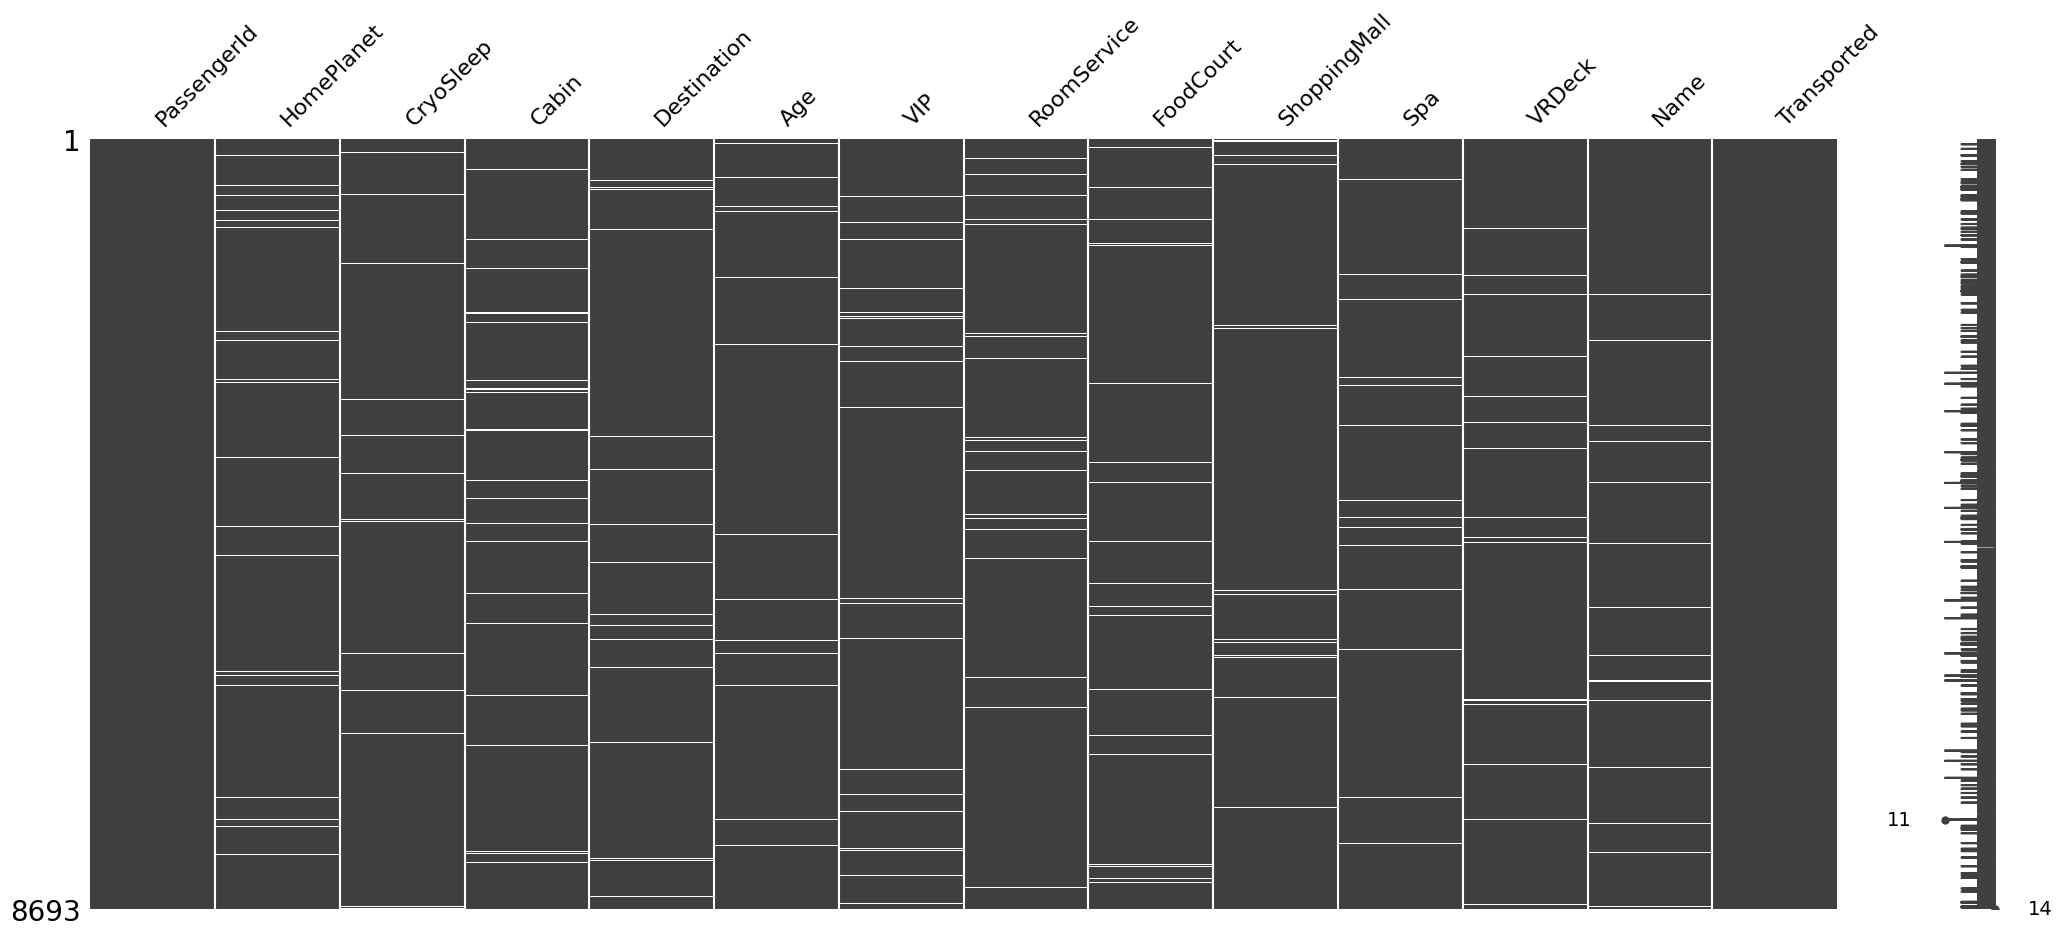

In [9]:
msno.matrix(train_df)

In [10]:
miss_count = train_df.isnull().sum()
miss_count

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
miss_count.sum()

2324

In [12]:
import seaborn as sns

In [13]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [14]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [15]:
cols = train_df.columns
for col in cols:
    num = len(train_df[col].unique())
    print(f"""Column {col} has {num} unique values""")

Column PassengerId has 8693 unique values
Column HomePlanet has 4 unique values
Column CryoSleep has 3 unique values
Column Cabin has 6561 unique values
Column Destination has 4 unique values
Column Age has 81 unique values
Column VIP has 3 unique values
Column RoomService has 1274 unique values
Column FoodCourt has 1508 unique values
Column ShoppingMall has 1116 unique values
Column Spa has 1328 unique values
Column VRDeck has 1307 unique values
Column Name has 8474 unique values
Column Transported has 2 unique values


In [16]:
type(train_df)

pandas.core.frame.DataFrame

In [17]:
def unique(df):
    cols = df.columns
    print("These are the columns in the dataframe : ")
    print("\n")
    print(cols)
    for col in cols:
        num = len(df[col].unique())
        print(f"""Column {col} has {num} unique values""")

In [18]:
unique(train_df)

These are the columns in the dataframe : 


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Column PassengerId has 8693 unique values
Column HomePlanet has 4 unique values
Column CryoSleep has 3 unique values
Column Cabin has 6561 unique values
Column Destination has 4 unique values
Column Age has 81 unique values
Column VIP has 3 unique values
Column RoomService has 1274 unique values
Column FoodCourt has 1508 unique values
Column ShoppingMall has 1116 unique values
Column Spa has 1328 unique values
Column VRDeck has 1307 unique values
Column Name has 8474 unique values
Column Transported has 2 unique values


/Users/himanshubhenwal/miniconda3/envs/torch2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/himanshubhenwal/miniconda3/envs/torch2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/himanshubhenwal/miniconda3/envs/torch2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/himanshubhenwal/miniconda3/envs/torch2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

<Axes: xlabel='VRDeck', ylabel='Count'>

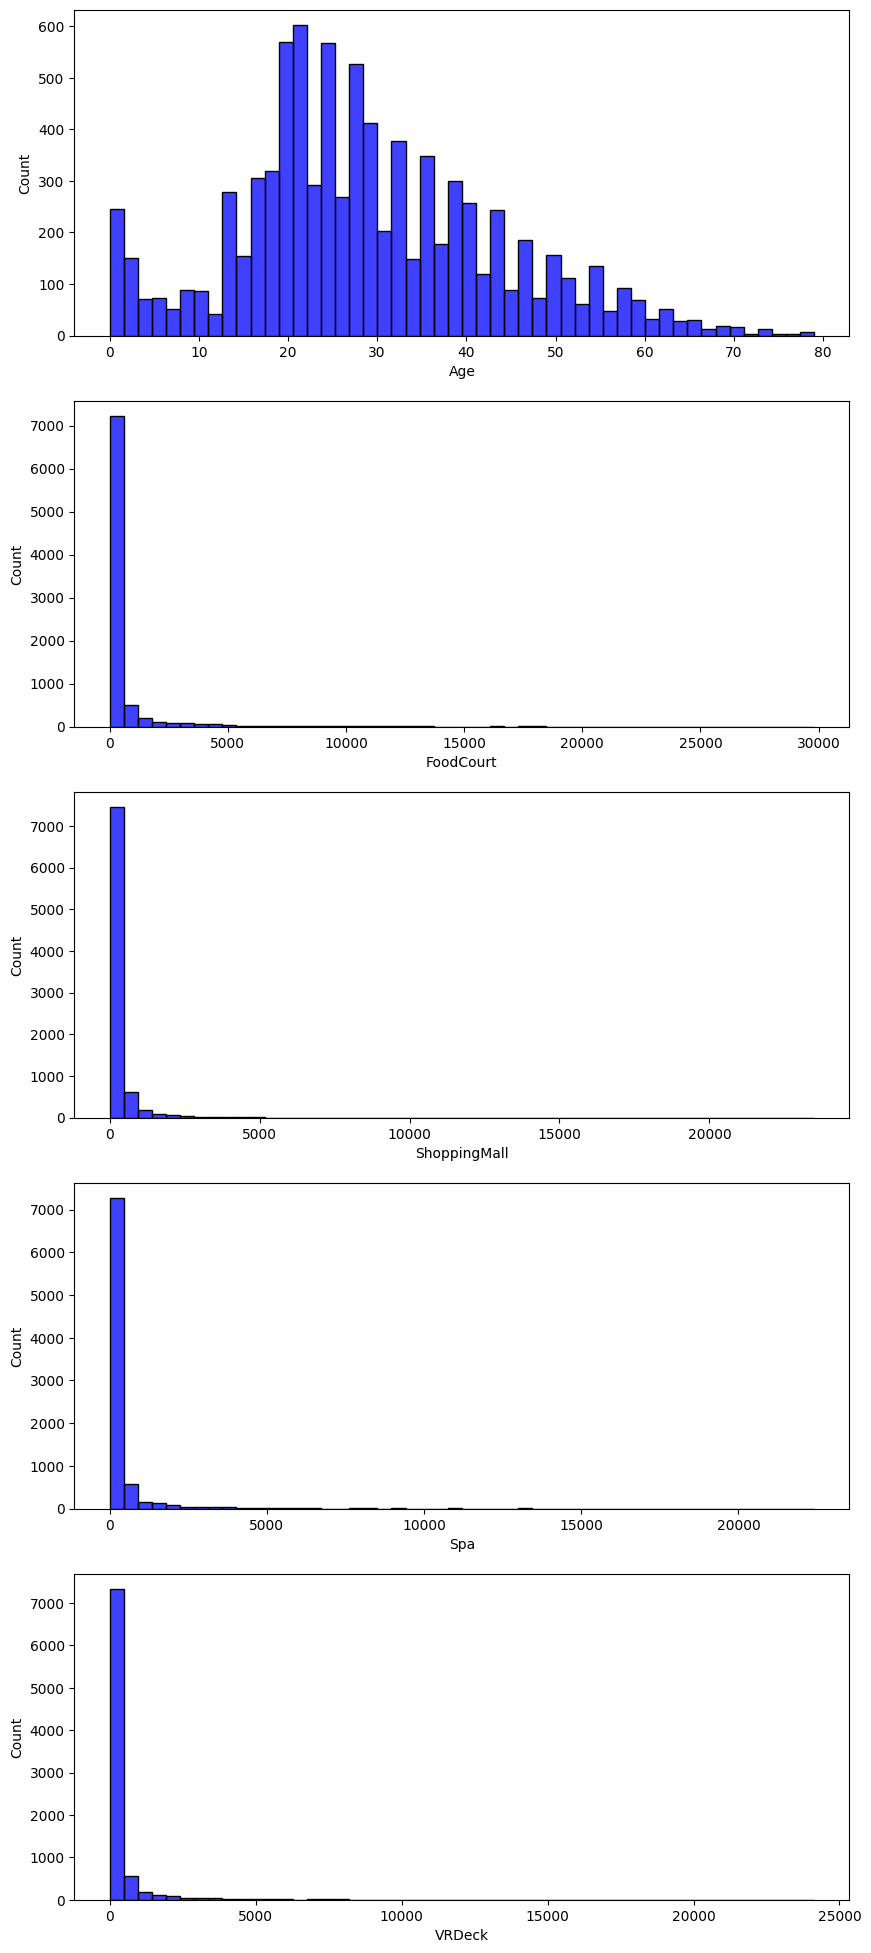

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(top=2)

sns.histplot(train_df['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(train_df['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(train_df['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(train_df['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(train_df['VRDeck'], color='b', bins=50, ax=ax[4])

In [20]:
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [21]:
train_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [22]:
train_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Name            200
Cabin           199
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [23]:
train_df['Transported'] = train_df['Transported'].astype(int)

In [24]:
train_df['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [25]:
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
train_df['VIP'] = train_df['VIP'].astype(int)

In [26]:
# Split Cabin into Deck, Cabin_num and Side
train_df[['Deck', 'Cabin_num', 'Side']] = train_df['Cabin'].str.split("/", expand=True)

In [27]:
train_df.drop(columns=['Cabin'], inplace=True)

In [28]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


In [29]:
def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

In [30]:
train, test = split_dataset(train_df)

In [31]:
import tensorflow_decision_forests as tfdf

In [32]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label='Transported')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label='Transported')

In [33]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [34]:
random_forest = tfdf.keras.RandomForestModel()
random_forest.compile(metrics=['accuracy'])

Use /var/folders/h1/hvj11pj94sv5t8hqh3xjv6ww0000gn/T/tmpz51qgemg as temporary training directory


In [ ]:
from wurlitzer import sys_pipes
with sys_pipes():
    random_forest.fit(x=train_ds)

Reading training dataset...
